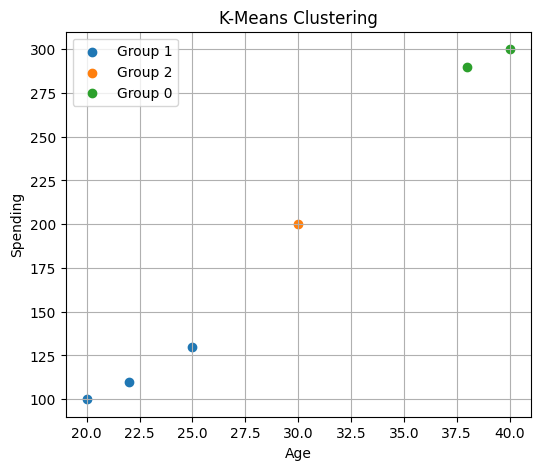

  Customer  Age  Spending  Group
0     Riya   20       100      1
1     Aman   30       200      2
2   Faizan   40       300      0
3     Neha   22       110      1
4    Imran   38       290      0
5    Sneha   25       130      1


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

data = {
    'Customer' : ['Riya','Aman','Faizan','Neha','Imran' , 'Sneha'],
    'Age' : [20,30,40,22,38,25],
    'Spending' : [100,200,300,110,290,130]
}

df = pd.DataFrame(data)
X = df[['Age', 'Spending']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
model = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Group'] = model.fit_predict(X)
plt.figure(figsize=(6,5))
for group in df['Group'].unique():
    clustered_data = df[df['Group'] == group]   #masking
    plt.scatter(clustered_data['Age'], clustered_data['Spending'], label=f'Group {group}')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

print(df)